# Provably Safe NN Controllers and Their Implementations

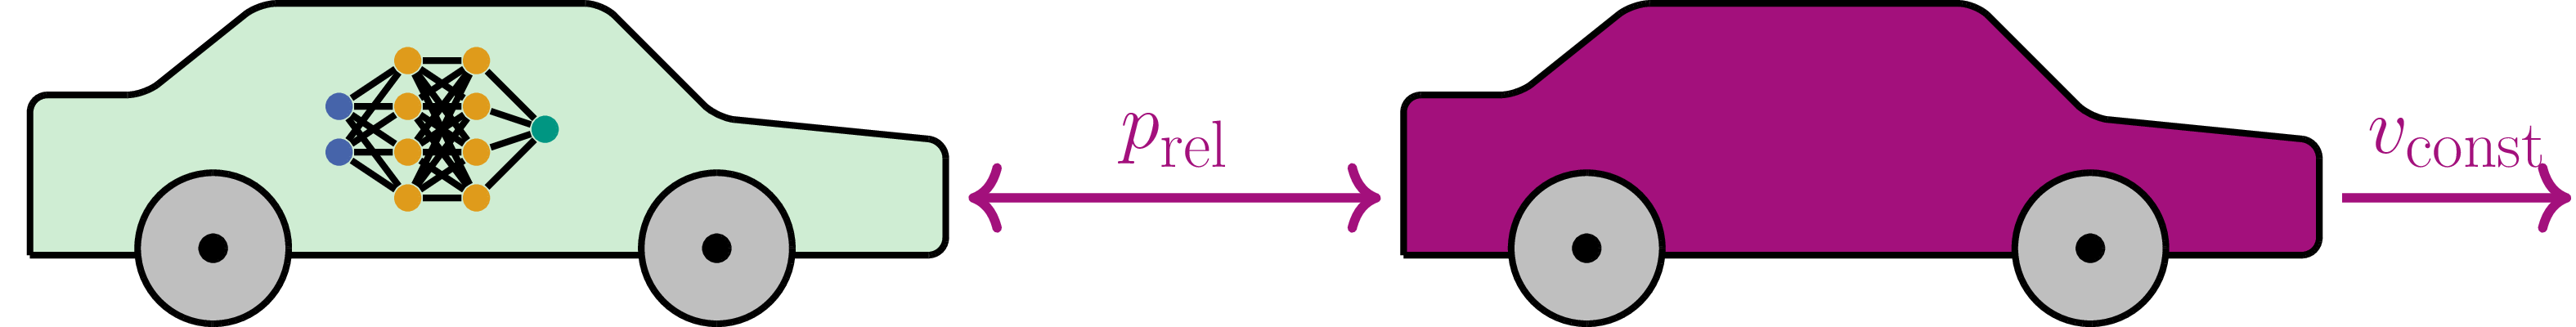

In [1]:
import libs.acc
from libs.gym_helper import *
import gymnasium as gym
from gymnasium import wrappers

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.utils import set_random_seed
import time
import numpy as np

set_random_seed(0)

# Initialize Evaluation Environment for ACC
eval_env = Monitor(gym.make('acc-discrete-v0'))

BRAKE = 2, None

ACCELERATE = 0, None

# A naive controller
### ... and what can go wrong

In [2]:
def control(state,**kwargs):
    relativePosition, relativeVelocity = state
    # Break if we are getting too close...
    if relativePosition+relativeVelocity < 0:
        return BRAKE
    else:
        return ACCELERATE

show_run(eval_env, control, obs=[50,-8])

We should **verify** our control software!

# KeYmaera X

## ...

# But what about Neural Control?

In [ ]:
env1 = get_env1()
model1 = train_model1(env1)

In [ ]:
show_run(eval_env, model1.predict, obs=[50,-8])

**NN Controller should be verified, too!**

# Training a better model...

## ...takes more time than we have right now

In [ ]:
good_nn = load_good_model()

# dl-based safety verification for Neural Networks

In [23]:
! cat property/formula

(
(0<=prel & prel<=100 & -34 <= vrel & vrel <= 34 &
-100000 <= x1post & x1post <= 100000  & -100000 <= x2post & x2post <= 100000  & -100000 <= x3post & x3post <= 100000) &
(prel > 0 & (prel > vrel^2 / (2*B) | vrel > 0))
)
->
(
x1post >= x2post &
x1post >= x3post &
(vrel - T*A > 0 | 
prel + T * vrel + (-A) * T^2 / 2 > (vrel + T * (-A))^2 / (2 * B) ) |
x2post >= x1post &
x2post >= x3post &
((vrel > 0) |
prel + T * vrel > vrel^2 / (2 * B)) |
x3post >= x2post &
x3post >= x1post 
)

# dl-based safety verification for Neural Networks

The specifications we generate:
- Have **arbitrary propositional structure**
- Contain **polynomial arithmetic**

In [24]:
! NCubeV property/formula property/fixed property/mapping good_nn.onnx ./results_good

[CMD] Using SMT solver: Z3
[CMD] Using verifier: NNEnum
[CMD] Parsed initial query: SNNT.AST.Query(((-1.0*x1<0.0&(((-1.0*prel)+(0.0909090909090909*(vrel^2.0)))<0.0|-1.0*x2<0.0)&-1.0*x1<=0.0&1.0*x1<=100.0&-1.0*x2<=34.0&1.0*x2<=34.0&-1.0*x3<=100000.0&1.0*x3<=100000.0&-1.0*x4<=100000.0&1.0*x4<=100000.0&-1.0*x5<=100000.0&1.0*x5<=100000.0)->((-1.0*x31.0*x4<=0.0&-1.0*x31.0*x5<=0.0&(-1.0*x2<-0.31|(0.024236363636363636+(-1.0*prel)+(-0.056363636363636366*vrel)+(-0.1*vrel)+(0.0909090909090909*(vrel^2.0)))<0.0))|(1.0*x3-1.0*x4<=0.0&-1.0*x41.0*x5<=0.0&(-1.0*x2<0.0|((-1.0*prel)+(-0.1*vrel)+(0.0909090909090909*(vrel^2.0)))<0.0))|(1.0*x4-1.0*x5<=0.0&1.0*x3-1.0*x5<=0.0))), Set(SNNT.AST.Variable[x2post, x1post, vrel, x3post, prel]), 2, 3, Dict{SNNT.AST.ApproxQuery, SNNT.AST.Approximation}(), Vector{Float64}[])
[CMD] SMT Timeout: 10s
[CTRL] Iterating over conjunctions...
[APPROX] Trying to build approximation...
[APPROX] Generating expression for (vrel^2.0)...
Val Ranges: Dict(:x2 => [-34.0, 34.0], :x5 

# So what does safe driving look like?

In [ ]:
show_run(eval_env, good_nn, obs=[50,-8])

# But what about numerical imprecisions?

## ...

In [25]:
! NCubeV property/formula-num property/fixed property/mapping-num good_nn-num.onnx ./results_good

[CMD] Using SMT solver: Z3
[CMD] Using verifier: NNEnum
[CMD] Parsed initial query: SNNT.AST.Query(((-1.0*x1<=0.0&((-1.0*prel)+(0.0909090909090909*(vrel^2.0)))<=0.0&-1.0*x3<=-0.01&1.0*x3<=0.01&-1.0*x4<=-0.01&1.0*x4<=0.01&-1.0*x5<=-0.01&1.0*x5<=0.01&-1.0*x1<=0.0&1.0*x1<=100.0&-1.0*x2<=34.0&1.0*x2<=34.0&-1.0*x6<=100000.0&1.0*x6<=100000.0&-1.0*x7<=100000.0&1.0*x7<=100000.0&-1.0*x8<=100000.0&1.0*x8<=100000.0)->((-1.0*x31.0*x4-1.0*x61.0*x7<=0.0&-1.0*x31.0*x5-1.0*x61.0*x8<=0.0&(-1.0*x2<-0.31|(0.024236363636363636+(-1.0*prel)+(-0.056363636363636366*vrel)+(-0.1*vrel)+(0.0909090909090909*(vrel^2.0)))<0.0))|(1.0*x3-1.0*x41.0*x6-1.0*x7<=0.0&-1.0*x41.0*x5-1.0*x71.0*x8<=0.0&(-1.0*x2<0.0|((-1.0*prel)+(-0.1*vrel)+(0.0909090909090909*(vrel^2.0)))<0.0))|(1.0*x4-1.0*x51.0*x7-1.0*x8<=0.0&1.0*x3-1.0*x51.0*x6-1.0*x8<=0.0))), Set(SNNT.AST.Variable[delta1, x2post, delta2, delta3, x1post, vrel, x3post, prel]), 5, 3, Dict{SNNT.AST.ApproxQuery, SNNT.AST.Approximation}(), Vector{Float64}[])
[CMD] SMT Timeout: 10